In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2072576/2110848 [============================>.] - ETA: 0s

In [3]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# index offset of 3 
decode_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])

368640/550378 [===================>..........] - ETA: 0s

In [5]:
decode_newswire

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

In [6]:
decode_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[20]])
decode_newswire

"? leading u s farm state senators are seeking to ? into the ? ? trade bill a provision that would broaden eligibility requirements under the u s agriculture department's export enhancement program eep to include traditional buyers of u s farm products including the soviet union senate staff said under existing criteria usda can offer eep subsidies to ? export markets lost to competing nations' unfair trading practices senate agriculture committee chairman patrick leahy d vt is leading a group of farm state senators in an effort to broaden the criteria in such a way as to enable moscow to be eligible for the subsidies sources said the senators including senate finance committee chairman lloyd bentsen d tex max ? d ? david ? d ? john ? d ? and ? ? r miss also may ? into the trade bill a measure to shield pork producers and processors from canadian imports the measure sponsored by sen charles ? r iowa would clarify the definition of industry in determining whether or not imports were cau

# Vectorize text

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    return results

In [10]:
x_train = vectorize_sequences(train_data)

In [11]:
x_train[10]

array([ 0.,  1.,  0., ...,  0.,  0.,  0.])

In [12]:
x_test = vectorize_sequences(test_data)

# One-hot encoding labels

In [13]:
def one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i,lab in enumerate(labels):
        results[i, lab] = 1.
    return results

In [15]:
one_hot_train_labels = one_hot(train_labels)

In [16]:
one_hot_test_labels = one_hot(test_labels)

In [17]:
one_hot_train_labels[10]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [18]:
from keras.utils.np_utils import to_categorical

In [21]:
one_hot_train_labels_keras = to_categorical(train_labels)

In [22]:
one_hot_train_labels_keras[10]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

# Network

In [23]:
from keras import models, layers

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [26]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Validation set

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training

In [28]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 0s - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/10
7982/7982 [==============================] - 0s - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/10
7982/7982 [==============================] - 0s - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/10
7982/7982 [==============================] - 0s - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/10
7982/7982 [==============================] - 0s - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/10
7982/7982 [==============================] - 0s - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/10
7982/7982 [==============================] - 0s - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.8010
Epoch 8/10
7982/7982 [==============================] - 0s - loss: 0.3704 - a

# Plotting

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_loss(val_loss,loss, epochs):
    plt.plot(epochs, val_loss, '-o', label='validation loss')
    plt.plot(epochs, loss, '-+', label='training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    plt.show()
def plot_acc(val_acc, acc, epochs):
    plt.plot(epochs, val_acc, '-o', label='validation accuracy')
    plt.plot(epochs, acc, '-+', label='training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()
def plot_history(history):
    history.history.keys()
    val_loss = history.history['val_loss']
    loss = history.history['loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(val_loss)+1)
    plot_loss(val_loss, loss, epochs)
    plot_acc(val_acc, acc, epochs)

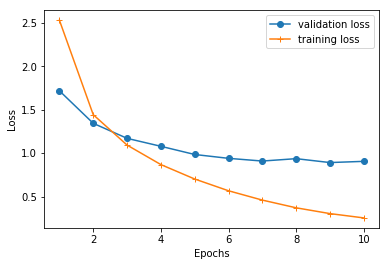

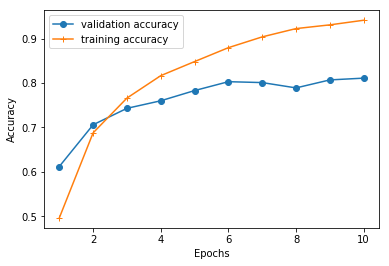

In [30]:
plot_history(history)

# Evaluate on test set

In [31]:
model.fit(x_train,
         one_hot_train_labels,
         epochs=9,
         batch_size=512,
         validation_data=(x_test, one_hot_test_labels))

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 1s - loss: 0.2944 - acc: 0.9335 - val_loss: 0.9706 - val_acc: 0.7921
Epoch 2/9
8982/8982 [==============================] - 1s - loss: 0.2347 - acc: 0.9423 - val_loss: 0.9778 - val_acc: 0.7965
Epoch 3/9
8982/8982 [==============================] - 1s - loss: 0.2029 - acc: 0.9468 - val_loss: 1.0003 - val_acc: 0.7916
Epoch 4/9
8982/8982 [==============================] - 1s - loss: 0.1786 - acc: 0.9502 - val_loss: 1.0217 - val_acc: 0.7939
Epoch 5/9
8982/8982 [==============================] - 1s - loss: 0.1622 - acc: 0.9523 - val_loss: 1.0220 - val_acc: 0.7965
Epoch 6/9
8982/8982 [==============================] - 1s - loss: 0.1482 - acc: 0.9537 - val_loss: 1.0738 - val_acc: 0.7925
Epoch 7/9
8982/8982 [==============================] - 1s - loss: 0.1389 - acc: 0.9528 - val_loss: 1.0601 - val_acc: 0.7939
Epoch 8/9
8982/8982 [==============================] - 1s - loss: 0.1318 - acc: 0.95

In [32]:
results = model.evaluate(x_test, one_hot_test_labels)

2016/2246 [=========================>....] - ETA: 0s

In [33]:
results

[1.1226311753290843, 0.79073909177168711]

# Random baseline

In [34]:
import copy

In [35]:
test_labels_copy = copy.copy(test_labels)

In [36]:
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18521816562778273

# Predictions

In [39]:
predictions = model.predict(x_test)

In [40]:
predictions[0]

array([  1.06159296e-05,   1.62225024e-05,   3.36409158e-08,
         8.55107665e-01,   1.33992523e-01,   1.38536320e-08,
         4.66304826e-08,   1.06315776e-04,   3.19845462e-03,
         5.32361673e-06,   8.01137139e-05,   7.11752917e-04,
         8.97360296e-05,   6.91581647e-07,   1.41475937e-06,
         2.84545331e-06,   2.79629690e-04,   6.47508250e-06,
         1.75286168e-05,   9.34697338e-04,   4.56932420e-03,
         5.88641327e-04,   7.71023406e-06,   7.69626467e-07,
         1.58862224e-06,   9.96731728e-07,   7.60017160e-10,
         3.52828579e-06,   3.15337602e-05,   4.37445033e-06,
         1.06289212e-04,   1.08376426e-07,   2.94327256e-05,
         4.59627216e-07,   3.93183473e-05,   2.04464209e-06,
         3.79255580e-05,   1.05400625e-06,   4.78524771e-06,
         2.75375925e-07,   2.56505973e-06,   2.05590459e-06,
         3.12209841e-06,   3.18066888e-08,   1.04427800e-08,
         9.06838071e-09], dtype=float32)

In [41]:
np.argmax(predictions[0])

3

# Information bottleneck

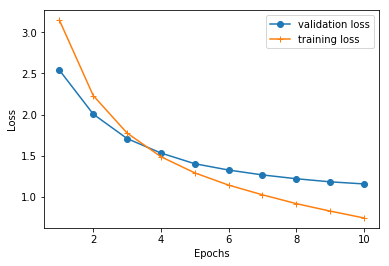

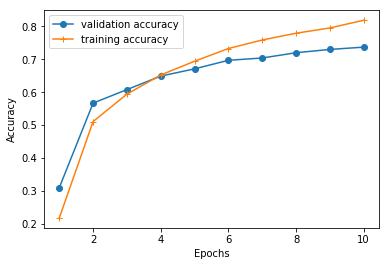

In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=512,
                   validation_data=(x_val,y_val),
                   verbose=0)

plot_history(history)

In [44]:
model.evaluate(x_test, one_hot_test_labels)

2080/2246 [==========================>...] - ETA: 0s

[1.2750998761965988, 0.7092609082813891]